In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

In [185]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [186]:
df.count()

Unnamed: 0              2223
ID                      2223
Year_Birth              2223
Education               2223
Marital_Status          2223
Income                  2223
Kidhome                 2223
Teenhome                2223
Dt_Customer             2223
Recency                 2223
MntWines                2223
MntFruits               2223
MntMeatProducts         2223
MntFishProducts         2223
MntSweetProducts        2223
MntGoldProds            2223
NumDealsPurchases       2223
NumWebPurchases         2223
NumCatalogPurchases     2223
NumStorePurchases       2223
NumWebVisitsMonth       2223
Response                2223
Complain                2223
Age                     2223
Total_Spent             2223
BuyingPower             2202
HouseHoldMembers        2223
Total_Children          2223
TotalPurchases          2223
Dt_CustomerConverted    2223
SinceEnrolled           2223
CLV                     2223
AOV                     2223
dtype: int64

In [187]:
df.dropna(inplace=True)

In [188]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [189]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','Complain', 'NumWebVisitsMonth','CLV','Age', 'Complain', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'BuyingPower', 'AOV']]

# data = df[['Income', 'Kidhome', 'Teenhome', 'Marital_Status', 'Education', 'Response', 'Recency', 'TotalPurchases','Complain', 'NumWebVisitsMonth','BuyingPower','Age']]

data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [190]:
data.count()

Income                 2202
Total_Children         2202
Marital_Status         2202
Education              2202
Response               2202
NumDealsPurchases      2202
NumWebPurchases        2202
NumCatalogPurchases    2202
NumStorePurchases      2202
Complain               2202
NumWebVisitsMonth      2202
CLV                    2202
Age                    2202
Complain               2202
MntWines               2202
MntFruits              2202
MntMeatProducts        2202
MntFishProducts        2202
MntSweetProducts       2202
MntGoldProds           2202
BuyingPower            2202
AOV                    2202
dtype: int64

In [191]:
ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [192]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [193]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


oversampler = RandomOverSampler(random_state=0)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [194]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [195]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))



In [196]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [197]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.6974
Precision: 0.2756
Recall: 0.6263
F1: 0.3827
AUC: 0.6681


In [198]:
print(len(preds))

661


# Figures

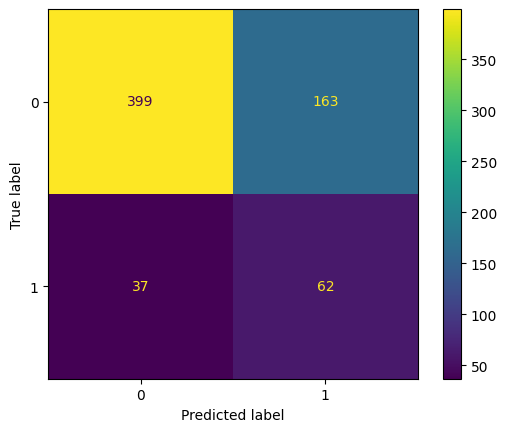

In [199]:
actual = y_test
predicted = preds
confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot()
plt.show()

c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Progra

c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Progra

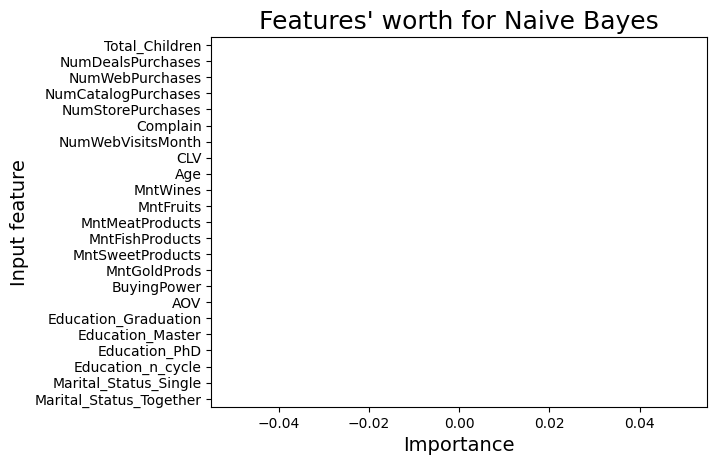

Marital_Status_Together: 0.0
Marital_Status_Single: 0.0
NumDealsPurchases: 0.0
NumWebPurchases: 0.0
NumCatalogPurchases: 0.0
NumStorePurchases: 0.0
Complain: 0.0
NumWebVisitsMonth: 0.0
CLV: 0.0
Age: 0.0
Complain: 0.0
MntWines: 0.0
MntFruits: 0.0
MntMeatProducts: 0.0
MntFishProducts: 0.0
MntSweetProducts: 0.0
MntGoldProds: 0.0
BuyingPower: 0.0
AOV: 0.0
Education_Graduation: 0.0
Education_Master: 0.0
Education_PhD: 0.0
Education_n_cycle: 0.0
Total_Children: 0.0


In [200]:

pipeline = Pipeline([
    ('classifier', classifier)
])

pipeline.fit(X_train, y_train)

result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for Naive Bayes", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")